<a href="https://colab.research.google.com/github/lakshmy1234/Face-mask-recognition/blob/main/Apriori_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
from mlxtend.frequent_patterns import apriori  
from mlxtend.frequent_patterns import association_rules

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/EXTRAASSS/BreadBasket_DMS.csv')
df.isna().sum()


Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [4]:
df.dtypes

Date           object
Time           object
Transaction     int64
Item           object
dtype: object

# **Data Visualizations**

### **Display the total sales report of each item.**

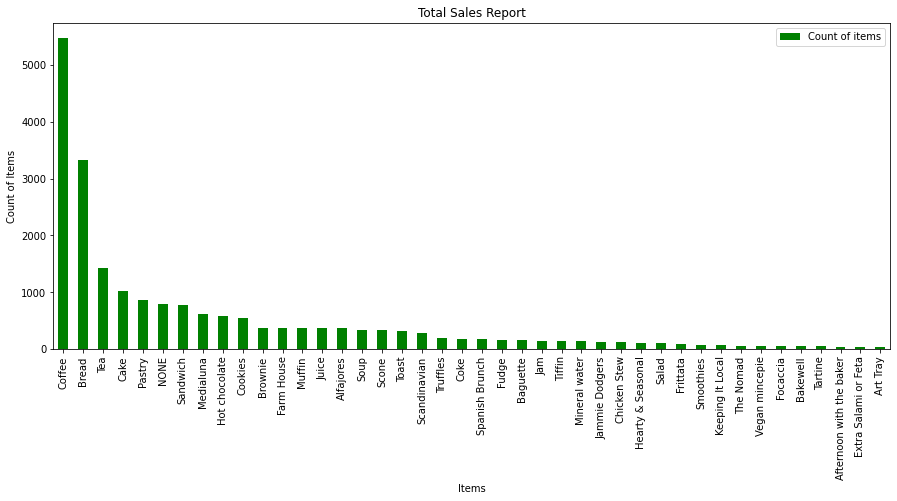

In [5]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
df_count = df.groupby(['Item'])['Item'].count().reset_index(name ='Count')
df_count=df_count.loc[df_count['Count']>30]

df_count=df_count.sort_values('Count',ascending=False)

bargraph=df_count.plot.bar(x='Item',y='Count',label='Count of items',figsize=(15,6),color='g')
plt.title("Total Sales Report")
plt.ylabel ('Count of Items')
plt.xlabel ('Items')
plt.show()

*From the above graph, it is clear that the maximum sales has occured for Coffee followed by bread, tea and so on. Also, the sales for Art Tray is the minimum.*

### **Display the daily total sales report**



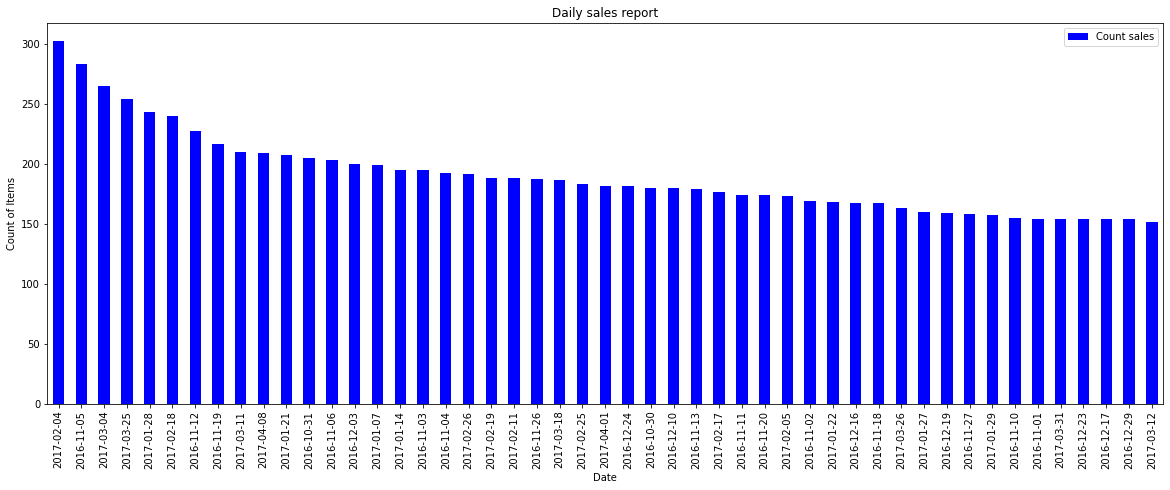

In [6]:
df_daily= df.groupby(['Date'])['Item'].count().reset_index(name ='Count')
df_daily=df_daily.loc[df_daily['Count']>150]

df_daily=df_daily.sort_values('Count',ascending=False)

bargraph=df_daily.plot.bar(x='Date',y='Count', label="Count sales",figsize=(20,7),color='b')
plt.title("Daily sales report")
plt.ylabel ('Count of Items')
plt.xlabel ('Date')
plt.show()

### **Display the Annual sales report.**

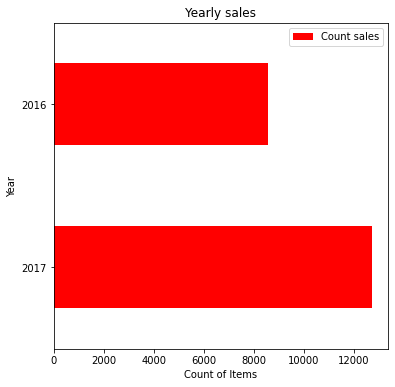

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['year']= df['Date'].dt.year
df_year = df.groupby(['year'])['Item'].count().reset_index(name ='Count')


df_year=df_year.sort_values('Count',ascending=False)

bargraph=df_year.plot.barh(x='year',y='Count', label="Count sales",figsize=(6,6),color='r')
plt.title("Yearly sales")
plt.xlabel ('Count of Items')
plt.ylabel ('Year')
plt.show()


*Clearly, the total sales is max for the year 2017 than that for the year 2016.*

### **Display the Monthly Sales report**

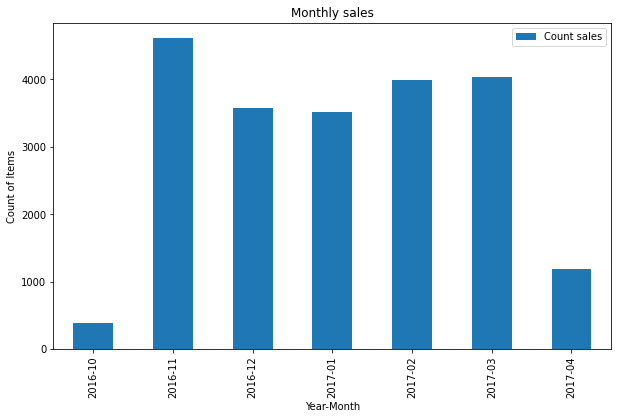

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['month_year']= df['Date'].dt.to_period('M')
df_month_year=df.groupby(['month_year'])['Item'].count().reset_index(name ='Count')

bargraph=df_month_year.plot.bar(x='month_year',y='Count', label="Count sales",figsize=(10,6))
plt.title("Monthly sales")
plt.ylabel ('Count of Items')
plt.xlabel ('Year-Month')
plt.show()

*Clearly, the sales is max for the month of Nov 2016 folllowed by March 2017, Feb 2017 and so on.*

### **Display the Hourly Sales report**

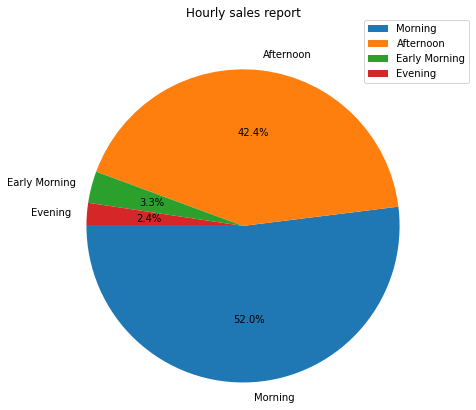

In [9]:
df['Time'] = pd.to_datetime(df['Time']).dt.time
df['hour']=df.Time.apply(lambda x: x.hour)

b = list(range(1,25))
label = ['Early Morning','Morning','Noon','Afternoon','Evening','Night','Late Night']

def f(x):
    if (x >= 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Afternoon'    
    elif (x > 16) and (x <= 19) :
        return 'Evening'
    elif (x > 19) and (x <= 24):
        return'Night'
    elif (x < 4):
        return'Late Night'
df['hour'] = df['hour'].apply(f)


df_hour=df.groupby(['hour'])['Item'].count().reset_index(name ='Count')
df_hour=df_hour.sort_values('Count',ascending=False)
df_hour=df_hour.loc[df_hour['Count']>50]
df_hour

plt.pie(df_hour['Count'],autopct='%1.1f%%', labels=df_hour["hour"],radius=1.8,startangle=180,labeldistance=1.1)
plt.title('Hourly sales report',pad=100)
plt.legend(loc="center",bbox_to_anchor=(1.3,1.3))
plt.show()


*Clearly, the max of sales has been occured during the morning hours which is about 52% of the total sales. Thus, people prefer to shop during moring hours than any other time of the day.*

### **Display the Sales report of Morning hours**

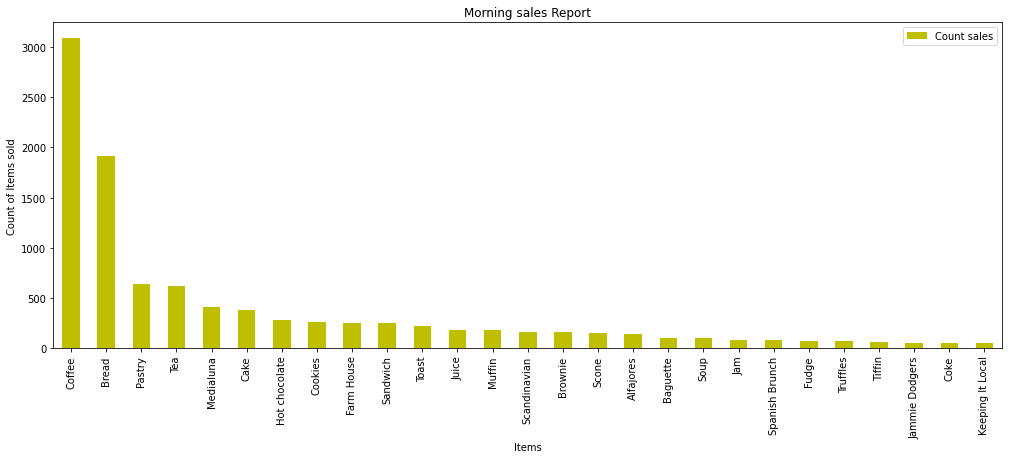

In [10]:
df_morning=df.loc[(df['hour']=='Morning') & (df['Item']!='NONE')]
df_morning=df_morning.groupby(['Item'])['Item'].count().reset_index(name ='Count')

df_morning=df_morning.loc[df_morning['Count']>50]
df_morning=df_morning.sort_values('Count',ascending=False)

bargraph=df_morning.plot.bar(x='Item',y='Count', label="Count sales",figsize=(17,6),color='y')
plt.title("Morning sales Report")
plt.ylabel ('Count of Items sold')
plt.xlabel ('Items')
plt.show()


### **Display the hourly sales report of each item**

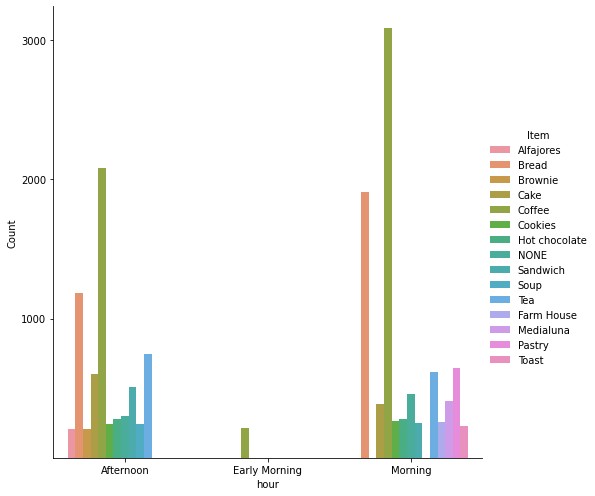

In [11]:
df_morning_list=df.groupby(['hour','Item'])['Item'].count().reset_index(name ='Count')
df_morning_list=df_morning_list.loc[df_morning_list['Count']>200]

g=sns.catplot(x='hour',y='Count',hue='Item',data=df_morning_list,kind='bar',height=7)
g.set(yticks=[1000,2000,3000])

*The above fig shows the sales of each items sold along with the hour at which it was sold. It clearly shows that the sales is maximum at morning hours as the number and quantity of items sold at morning hours is greater than the sales at any other time. Also, people prefer to buy coffee more at morning than any other time.*

# **Unsupervised Machine Learning**
We know that in Supervised machine learning, the models are trained using labelled data under the supervision of training data. But there may be many cases in which we do not have labelled data and need to find the hidden patterns from the given dataset. So, to solve such types of cases in machine learning, we need unsupervised learning techniques.
### **Types of Unsupervised Learning Algorithm:**
The unsupervised learning algorithm can be further categorized into two types of problems:

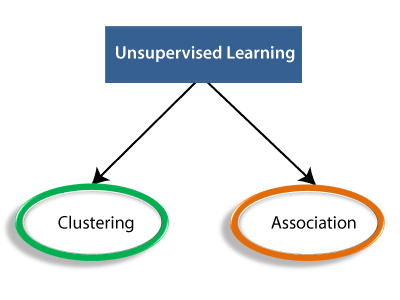


 

* **Clustering:** Clustering is a method of grouping the objects into clusters such that objects with most similarities remains into a group and has less or no similarities with the objects of another group. Cluster analysis finds the commonalities between the data objects and categorizes them as per the presence and absence of those commonalities.

* **Association:** An association rule is an unsupervised learning method which is used for finding the relationships between variables in the large database. It determines the set of items that occurs together in the dataset. Association rule makes marketing strategy more effective. Such as people who buy X item (suppose a bread) also tend to purchase Y (Butter/Jam) item. A typical example of Association rule is Market Basket Analysis.

Association rule learning can be divided into three types of algorithms:
1.	**Apriori Algorithm**
2. **Eclat**
3. **F-P Growth Algorithm**

Association rule learning works on the concept of If and Else Statement, such as if A then B.

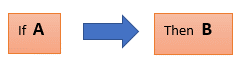
 


Here the **If** element is called antecedent, and **then** statement is called as Consequent. These types of relationships where we can find out some association or relation between two items is known as ***single cardinality.*** It is all about creating rules, and if the number of items increases, then cardinality also increases accordingly. So, to measure the associations between thousands of data items, there are several metrics.

**For more details regarding apriori algorithm, click**
[here](https://towardsdatascience.com/apriori-algorithm-for-association-rule-learning-how-to-find-clear-links-between-transactions-bf7ebc22cf0a) 

In [12]:
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/EXTRAASSS/BreadBasket_DMS.csv')
df1 

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


# **Data Preprocessing** 



**Since we need only the items sold and the transaction details, we drops the other columns from the data set.**




In [13]:
df1.drop(['Date','Time'],axis=1,inplace=True)
df1

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
...,...,...
21288,9682,Coffee
21289,9682,Tea
21290,9683,Coffee
21291,9683,Pastry


In [ ]:
# Check for missing values.

df1.isna().sum()

Transaction    0
Item           0
dtype: int64

*Clearly, there are no missing values in the dataset.*

**Creating a new column named 'Count' which counts the number of each items in each transactions.**

In [14]:
transactions_str = df1.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
19635,9682,Tacos/Fajita,1
19636,9682,Tea,1
19637,9683,Coffee,1
19638,9683,Pastry,1


**Now wee need to create a new table that has transactions along the rows, items along the columns, and the count of each items sold along each cells in the table. The *pivot_table* function is used here for this purpose.** 

In [15]:
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item',
                                         values='Count').fillna(0)
my_basket

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**The *applymap()* function is used to apply a function to a Dataframe elementwise.This method applies a function that accepts and returns a scalar to every element of a DataFrame.**

In [16]:
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Using the 'apriori algorithm' with min_support=0.01 (1% of total)

frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items

,support,itemsets
0,0.036093,(Alfajores)
1,0.015948,(Baguette)
2,0.324940,(Bread)
3,0.039765,(Brownie)
4,0.103137,(Cake)
...,...,...
58,0.049523,"(Coffee, Tea)"
59,0.023502,"(Toast, Coffee)"
60,0.018256,"(NONE, Tea)"
61,0.014269,"(Sandwich, Tea)"


In [18]:
rules = association_rules(frequent_items,min_threshold =0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Bread),0.036093,0.324940,0.010282,0.284884,0.876728,-0.001446,0.943987
1,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
2,(Brownie),(Bread),0.039765,0.324940,0.010702,0.269129,0.828244,-0.002219,0.923639
3,(Cake),(Bread),0.103137,0.324940,0.023187,0.224822,0.691888,-0.010326,0.870846
4,(Bread),(Coffee),0.324940,0.475081,0.089393,0.275105,0.579069,-0.064980,0.724131
5,(Coffee),(Bread),0.475081,0.324940,0.089393,0.188163,0.579069,-0.064980,0.831522
6,(Cookies),(Bread),0.054034,0.324940,0.014374,0.266019,0.818673,-0.003184,0.919725
7,(Hot chocolate),(Bread),0.057916,0.324940,0.013325,0.230072,0.708047,-0.005494,0.876784
8,(Medialuna),(Bread),0.061379,0.324940,0.016787,0.273504,0.841708,-0.003157,0.929201
9,(NONE),(Bread),0.079005,0.324940,0.020564,0.260292,0.801048,-0.005107,0.912604


**The most frequent group of items sold and their corresponding support, confidence,lift, conviction, leverage values are clearly mentioned in the above table.**